In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
dataset=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
dataset.head(20)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,NaN,8.4583,0
6,1,male,54.0,51.8625,0
7,3,male,2.0,21.0750,0
8,3,female,27.0,11.1333,1
9,2,female,14.0,30.0708,1


In [4]:
inputs=dataset.drop(['Survived'],axis='columns')
target=dataset['Survived']

In [5]:
features_with_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
features_with_nan

['Age']

In [6]:
for features in features_with_nan:
    print(features,np.round(dataset[features].isnull().mean(),4),'% missing values')

Age 0.1987 % missing values


In [32]:
dataset['Age'].fillna(24.0,inplace=True)
print(dataset['Age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    24.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [33]:
for feature in features_with_nan:
    median_value=dataset[feature].mode()
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    print(dataset[feature].isnull().sum())

0


In [34]:
dataset.head(20)

,Pclass,Sex,Age,Fare,Survived,Agenan
0,3,1,22.0,7.2500,0,0
1,1,0,38.0,71.2833,1,0
2,3,0,26.0,7.9250,1,0
3,1,0,35.0,53.1000,1,0
4,3,1,35.0,8.0500,0,0
5,3,1,24.0,8.4583,0,0
6,1,1,54.0,51.8625,0,0
7,3,1,2.0,21.0750,0,0
8,3,0,27.0,11.1333,1,0
9,2,0,14.0,30.0708,1,0


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
dfle = dataset
dfle.Sex=le.fit_transform(dfle.Sex)
dfle

,Pclass,Sex,Age,Fare,Survived,Agenan
0,3,1,22.0,7.2500,0,0
1,1,0,38.0,71.2833,1,0
2,3,0,26.0,7.9250,1,0
3,1,0,35.0,53.1000,1,0
4,3,1,35.0,8.0500,0,0
...,...,...,...,...,...,...
886,2,1,27.0,13.0000,0,0
887,1,0,19.0,30.0000,1,0
888,3,0,24.0,23.4500,0,0
889,1,1,26.0,30.0000,1,0


In [37]:
X=dfle.drop(['Agenan','Survived'],axis='columns')
y=dfle['Survived']

In [38]:
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,24.0,23.4500
889,1,1,26.0,30.0000


In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [41]:
X_train.shape,X_test.shape

((801, 4), (90, 4))

In [42]:
from sklearn import tree

In [43]:
model=tree.DecisionTreeClassifier()

In [44]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
model.score(X_test,y_test)

0.7888888888888889

[Text(0.4074045817057292, 0.975, 'X[1] <= 0.5\ngini = 0.47\nsamples = 801\nvalue = [498, 303]'),
 Text(0.1664496527777778, 0.925, 'X[0] <= 2.5\ngini = 0.391\nsamples = 281\nvalue = [75, 206]'),
 Text(0.08506944444444445, 0.875, 'X[2] <= 2.5\ngini = 0.103\nsamples = 147\nvalue = [8, 139]'),
 Text(0.078125, 0.825, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0920138888888889, 0.825, 'X[3] <= 28.856\ngini = 0.091\nsamples = 146\nvalue = [7, 139]'),
 Text(0.078125, 0.775, 'X[3] <= 28.231\ngini = 0.183\nsamples = 59\nvalue = [6, 53]'),
 Text(0.07118055555555555, 0.725, 'X[2] <= 56.0\ngini = 0.158\nsamples = 58\nvalue = [5, 53]'),
 Text(0.052083333333333336, 0.675, 'X[2] <= 37.0\ngini = 0.133\nsamples = 56\nvalue = [4, 52]'),
 Text(0.034722222222222224, 0.625, 'X[2] <= 27.5\ngini = 0.091\nsamples = 42\nvalue = [2, 40]'),
 Text(0.027777777777777776, 0.575, 'X[2] <= 23.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.020833333333333332, 0.525, 'gini = 0.0\nsamples = 12\nvalue =

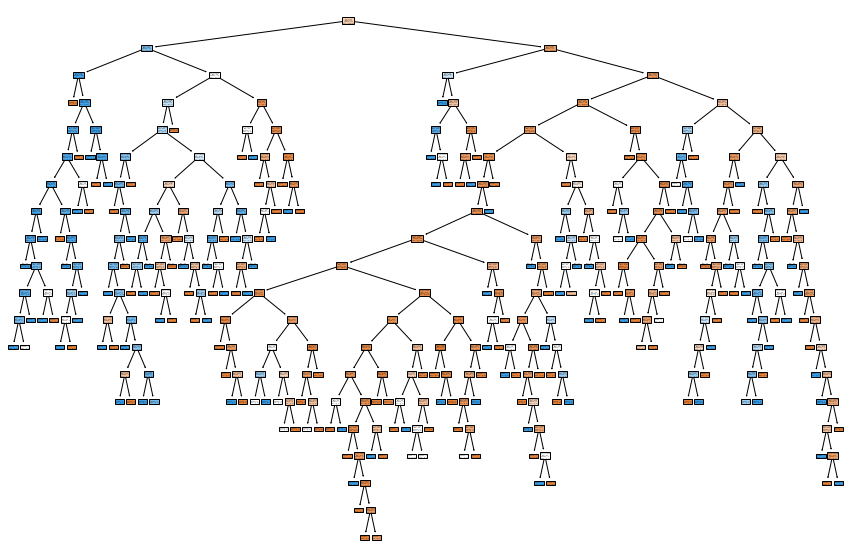

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [47]:
from sklearn.tree import export_text
text_tree=export_text(model)
print(text_tree)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_3 <= 28.86
|   |   |   |   |--- feature_3 <= 28.23
|   |   |   |   |   |--- feature_2 <= 56.00
|   |   |   |   |   |   |--- feature_2 <= 37.00
|   |   |   |   |   |   |   |--- feature_2 <= 27.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 19.88
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 13.43
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  13.43
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_3 >  19.88
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 25.50
|   |   |   |   |   |   |   |   |